# Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking


In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

 This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
tf.test.is_built_with_cuda()

False

# Load the dataset

Our dataset contains 60000 small training images that belongs to one of the below 10 classes

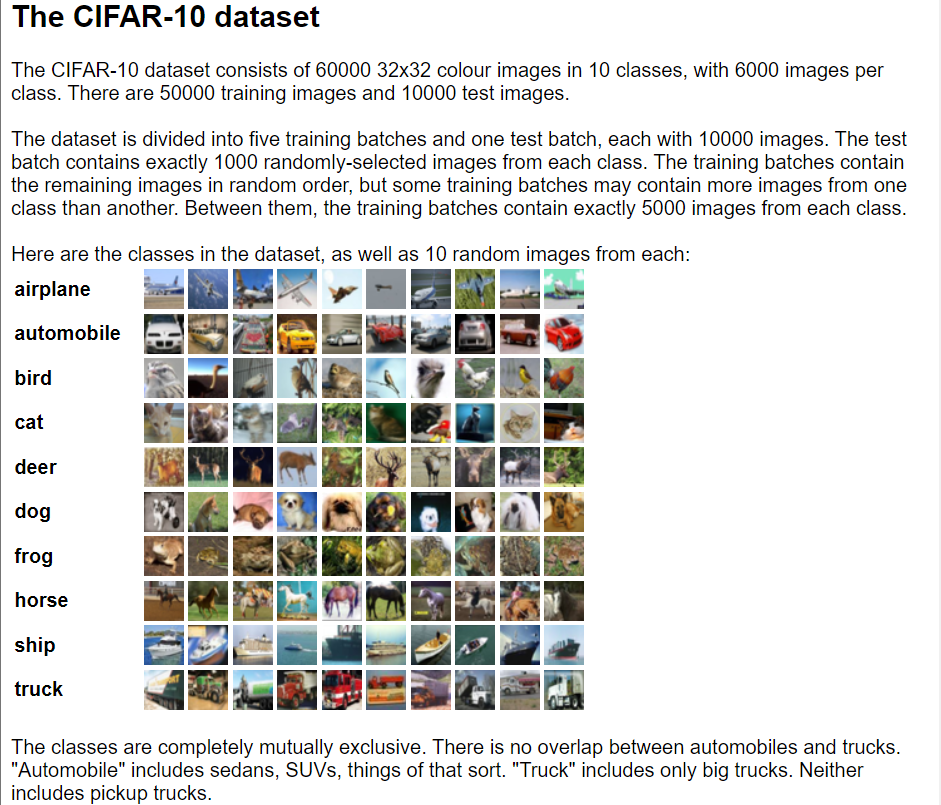

In [8]:
(X_train, y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

 The third dimension is three(RED,GREEN,BLUE)

In [10]:
X_train[0].shape

(32, 32, 3)

In [11]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

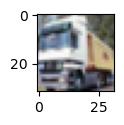

In [13]:
plot_sample(1)

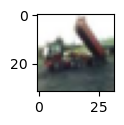

In [14]:
plot_sample(2)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

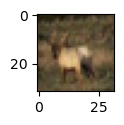

In [16]:
plot_sample(3)

In [17]:
y_train[3]

array([4], dtype=uint8)

In [18]:
classes[y_train[3][0]]

'deer'

# Preprocessing: Scale images

In [19]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [20]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [21]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
y_train_categorical=keras.utils.to_categorical(
      y_train,num_classes=10,dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Model building and training

In [23]:
32*32*3


3072

In [24]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [25]:
y_train_categorical.shape

(50000, 10)

In [26]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 37s 23ms/step - loss: 1.8119 - accuracy: 0.3553


 Since y_categorical is one hot encoded,so we use loss='categorical_crossentropy' and when its descrete like y_train here ,then we useloss="sparse_categorical_crossentropy",bydefault activation function is linear and will not use activation function at all.

In [27]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 2s 5ms/step


'cat'

In [28]:
classes[y_test[0][0]]

'cat'

# It predicted true

In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [30]:
X_test_scaled[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [31]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 6ms/step - loss: 1.6629 - accuracy: 0.4136


[1.662925362586975, 0.41359999775886536]

In [32]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Measure training time on a CPU

In [33]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 35s 22ms/step - loss: 1.8137 - accuracy: 0.3534
35.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Lets measure training time on a GPU

In [34]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 35s 22ms/step - loss: 1.8105 - accuracy: 0.3555
35.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


we can see that GPU is almost 15 times faster(but mine is 1.5 times only). We ran only one epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning

# Customer Churn Prediction Using Artificial Neural Network (ANN)

 Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [36]:
df=pd.read_csv(r"C:\Users\Ayush\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3432,8174-TBVCF,Female,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),94.80,6859.05,No
1199,7126-RBHSD,Female,0,Yes,No,17,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,78.90,1348.95,No
6959,1024-KPRBB,Female,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Mailed check,89.10,3342,No
1275,5095-ETBRJ,Female,0,Yes,No,55,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,56.80,3112.05,No
5823,9867-NNXLC,Female,0,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,470.2,No


In [37]:
df.drop(['customerID'],axis='columns',inplace=True)

 inplace=True updates the df after drop

In [38]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column 

In [39]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# Ahh... it is string. Lets convert it to numbers

In [40]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [41]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

# Hmmm... some values seems to be not numbers but blank string. Let's find out such rows

In [42]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [43]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

 coerce hepls to do conversion while ignoring errors and puttong NA value in such places.

In [44]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [45]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [46]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

# Remove rows with space in TotalCharge

In [47]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [48]:
df.shape

(7043, 20)

In [49]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8684\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [50]:
df1.TotalCharges.dtype

dtype('float64')

In [51]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [52]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [53]:
df1[df1.Churn=='yes'].tenure

Series([], Name: tenure, dtype: int64)

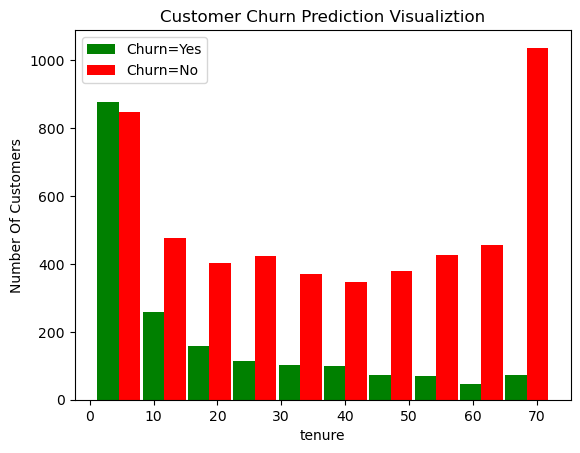

In [54]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

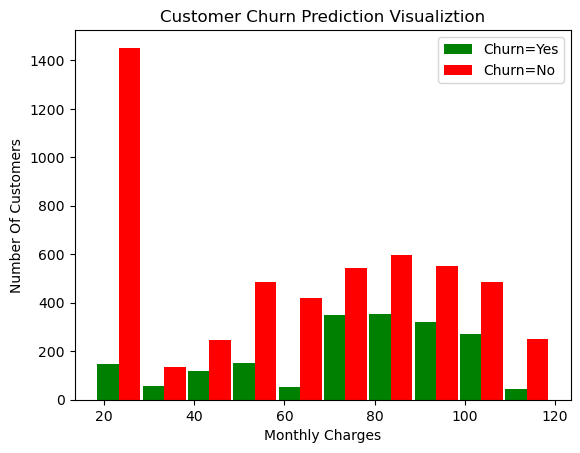

In [55]:
monthlycharge_churn_no = df1[df1.Churn=='No'].MonthlyCharges
monthlycharge_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([monthlycharge_churn_yes,monthlycharge_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [56]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [57]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object': 
            print(f'{column}: {df[column].unique}')

In [58]:
print_unique_col_values(df1)

gender: <bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object>
Partner: <bound method Series.unique of 0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7032, dtype: object>
Dependents: <bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object>
PhoneService: <bound method Series.unique of 0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7032, dtype: object>
MultipleLines: <bound method Series.unique of 0       No phone service
1                 

 gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']

# Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [59]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8684\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_8684\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


# Convert Yes and No to 1 or 0

In [60]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8684\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [61]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8684\2321097074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


array([1, 0], dtype=int64)

In [62]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [63]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1850,1,1,1,0,47,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
3057,0,0,1,1,25,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6704,1,0,1,1,59,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4296,1,0,1,1,35,1,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0


In [64]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [65]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [66]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6273,1,1,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6127,1,0,1,0,0.774648,1,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0
6144,0,1,1,0,0.309859,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0


In [67]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [69]:
len(X_train.columns)

26

In [70]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(26, activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')    
    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4918 - accuracy: 0.7621
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7936
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8020
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8082
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8117
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8112
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8130
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4029 - accura

In [71]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.7562


[0.6389127373695374, 0.7562189102172852]

In [72]:
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[4.0749925e-01],
       [4.2124680e-01],
       [1.4029779e-04],
       [8.7860000e-01],
       [7.3898450e-02]], dtype=float32)

In [73]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [74]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else :   
        y_pred.append(0)

In [75]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       999
           1       0.60      0.47      0.53       408

    accuracy                           0.76      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.74      0.76      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

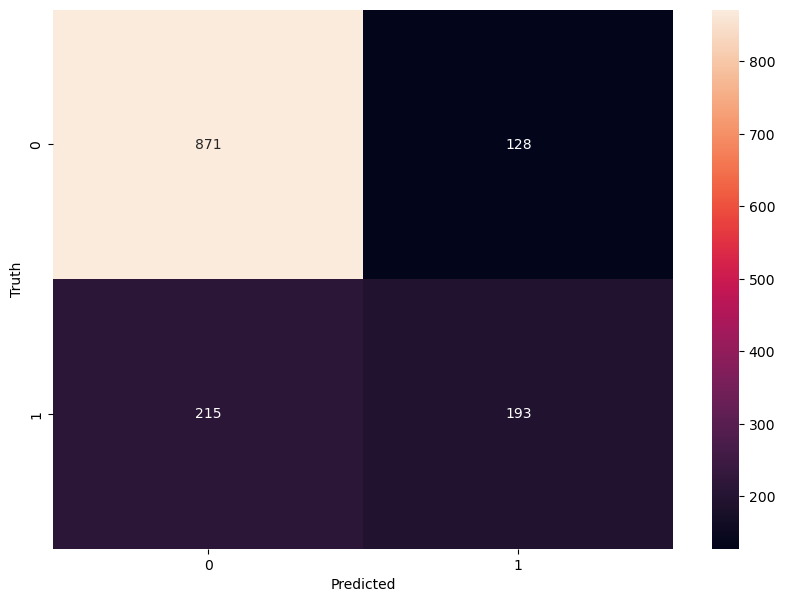

In [77]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Accuracy

In [78]:
round((186+865)/(186+222+865+134),2)

0.75

# Precision for 0 class. i.e. Precision for customers who did not churn

In [79]:
round(865/(865+222),2)

0.8

# Precision for 1 class. i.e. Precision for customers who actually churned

In [80]:
round(186/(186+134),2)

0.58

# Recall for 0 class

In [81]:
round(865/(865+134),2)

0.87

# Round for 1 class

In [82]:
round(186/(222+186),2)

0.46

 Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1

# Since our f1 -score is less for diff. classes,therefore,now we will work on improving our f1-score.

In [83]:
from tensorflow import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [84]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [85]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4863 - accuracy: 0.7730
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.7984
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8043
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8030
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8096
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4041 - accura

# Mitigating Skewdness of Data

# Method 1: Undersampling

In [86]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [89]:
count_class_0,count_class_1

(5163, 1869)

In [87]:
df_class_0.shape

(5163, 27)

In [88]:
df_class_1.shape

(1869, 27)

In [90]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [91]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [92]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

 Stratify make sure that you have balanced sample from 0 and 1 class to both test ans train set.

In [93]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [94]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6396 - accuracy: 0.6793
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7615
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7629
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7679
Epoch 11/

Method2: Oversampling

In [95]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [96]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [97]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [98]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [99]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7130
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7609
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7673
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7688
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7699
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7746
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7769
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.7798
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.7770
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4621 - accura

# Method3: SMOTE

In [100]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [102]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [106]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [108]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [109]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5405 - accuracy: 0.7259
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7787
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.7822
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7845
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7875
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7944
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.7967
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7966
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8011
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4242 - accura

# SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80

# Method4: Use of Ensemble with undersampling

In [117]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [118]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [120]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [121]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [122]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [123]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [124]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [125]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 987us/step - loss: 0.6179 - accuracy: 0.6843
Epoch 2/100
94/94 [==============================] - 0s 999us/step - loss: 0.5156 - accuracy: 0.7535
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7605
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 990us/step - loss: 0.4837 - accuracy: 0.7712
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7779
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7742
Epo

In [126]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7207
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.7498
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7562
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7622
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 995us/step - loss: 0.4743 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7666
Epoch 1

In [127]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.7082
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7643
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.7658
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.7723
Epoch 5/100
83/83 [==============================] - 0s 944us/step - loss: 0.4805 - accuracy: 0.7727
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7765
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7757
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7769
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7772
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7825
Epoch 1

In [128]:
len(y_pred1)

1407

In [129]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [130]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes